1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

(Отрезок [0;1] разбиваем в соответствии с данными весами (пропорционально)
Сколько операций сравнений?
(Вероятность попасть в 1 интервал) в данном
случае 1 сравнение длина 1-ого интервала это вероятность, 2 сравнения для 2-ого интервала, длина 2-ого интервала это вероятность и т.д.)

Сколько времени прошло, если неупорядоченно: 0.07506704330444336


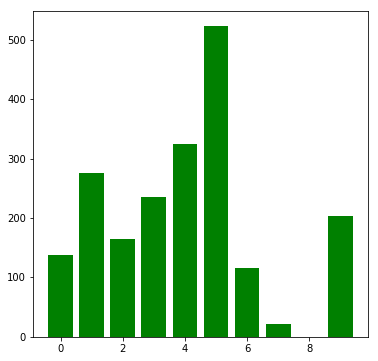

Сколько времени прошло, если упорядоченно: 0.012006998062133789


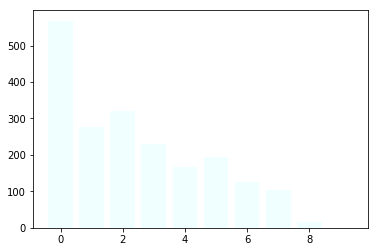

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
beg=time.time()
plt.figure(figsize=(6,6))
a = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a/=a.sum()
# Неупорядоченно
b=[a[:i].sum() for i in range(1,11)]
c=[]
d=[np.random.rand() for i in range(2000)]
for i in range(2000):
    k=0 #flag
    while k!=-1:
        if d[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k+=1
end=time.time()
print("Сколько времени прошло, если неупорядоченно:", end-beg)
plt.bar(np.arange(10), [c.count(i) for i in range(10)], color='green')
plt.show()
# Упорядоченно
beg=time.time()
a=np.sort(a)[::-1]
b=[a[:i].sum() for i in range(1,11)]
c = []
d=[np.random.rand() for i in range(2000)]
for i in range(2000):
    k=0
    while k!=-1:
        if d[i]<b[k]:
            c.append(k)
            k=-1
        else:
            k=k+1
end = time.time()
print("Сколько времени прошло, если упорядоченно:", end-beg)
plt.bar(np.arange(10), [c.count(i) for i in range(10)], color='azure')
plt.show()

2. Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения. Метод обратного.

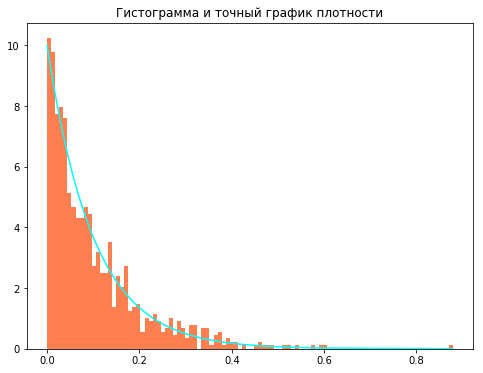

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from math import log, exp
plt.figure(figsize=(8,6))
a=10
r=[np.random.rand() for i in range(1000)]
r.sort()
hi=[-1/a*log(1-r[i]) for i in range(1000)]
plt.hist(hi,density=True,bins=100,color='coral')
pl=[a*exp(-a*hi[i]) for i in range(1000)]
plt.title("Гистограмма и точный график плотности")
plt.plot(hi,pl,color='aqua')
plt.show()

3. Обоснуйте, что метод отбора действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

Проблема: метод отбора очень долгий (скорсть работы тем меньше, чем больше пространство)

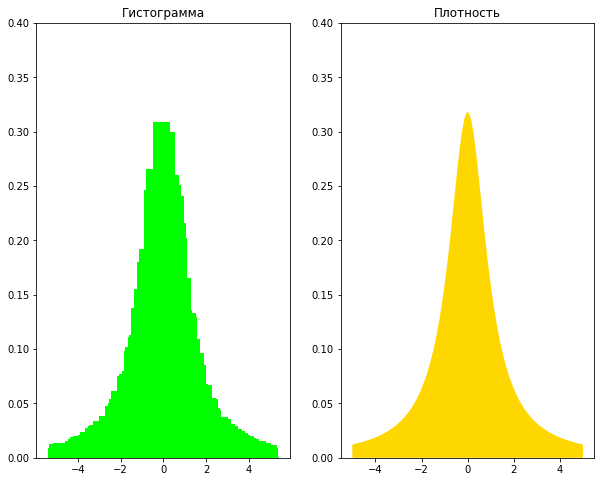

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy import stats
from math import pi
rasp=[10*np.random.rand()-5 for i in range(1000)]
rasp.sort()
cauchy=[]
k=0
while k!=1000:
        z = 1/pi*np.random.rand()
        if z < 1/(pi*(1+rasp[k]*rasp[k])):
            cauchy.append(z)
            k+=1
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title("Гистограмма")
plt.ylim(bottom=0)
plt.ylim(top=0.4)
plt.bar(rasp, cauchy, color='lime')

plt.subplot(1,2,2)
dist=stats.cauchy()
x=np.linspace(-5, 5, 100)
plt.title("Плотность")
plt.ylim(bottom=0)
plt.ylim(top=0.4)
plt.fill_between(x, 0, dist.pdf(x), facecolor='gold')
plt.show()

4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.
Аффиное преобразование

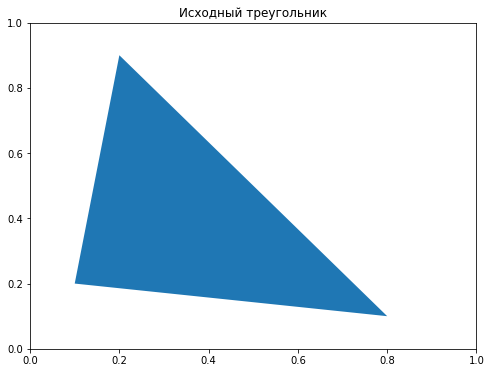

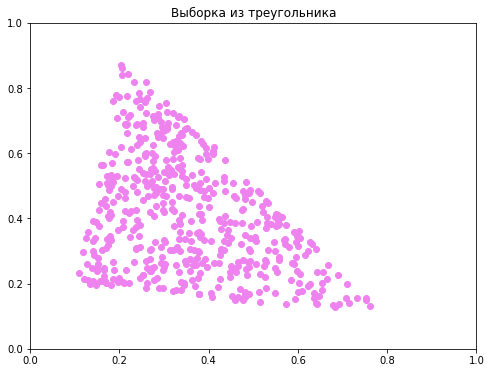

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import math
plt.figure(figsize=(8,6))
polygon=Polygon(0.1*np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.title("Исходный треугольник")
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()
xr=np.array([np.random.rand() for i in range(500)])
yr=np.array([np.random.rand() for i in range(500)])
for i in range(500):
    if yr[i]>-xr[i]+1:
        xr[i]=-xr[i]+1
        yr[i]=-yr[i]+1
xr*=math.hypot(0.7, 0.1)
yr*=math.hypot(0.7, 0.1)
a=math.atan2(-1, 7)
x=xr
xr=xr*math.cos(a)-yr*math.sin(a)+0.1
yr=x*math.sin(a)+yr*math.cos(a)+0.2
plt.figure(figsize=(8,6))
plt.scatter(xr, yr, color='violet')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.title("Выборка из треугольника")
plt.show()

5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

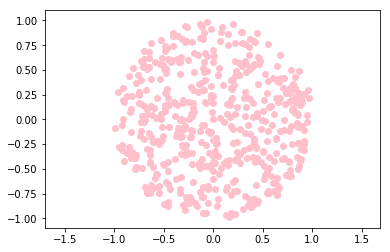

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import math
from matplotlib.patches import Circle
phi = np.random.uniform(low=0, high=2 * np.pi, size=500)
r = np.random.uniform(size=500)
r = np.sqrt(r)
plt.scatter(r*np.cos(phi), r*np.sin(phi), color='pink')
plt.axis('equal')
plt.show()

6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

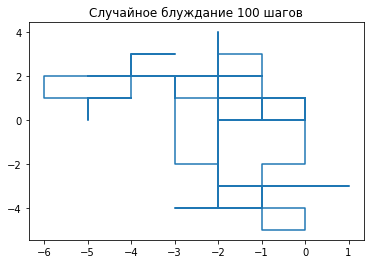

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
n = 100
a=np.random.choice(np.arange(n), n//2, replace=False)
b=np.random.choice(np.arange(n), n//2, replace=False)
c=np.ones(n)
d=np.ones(n)
c[a]=-1
d[b]=-1
u=np.cumsum(c)
v=np.cumsum(d)
x=(u+v)/2
y=(v-u)/2       
plt.title("Случайное блуждание " + str(n) + " шагов")
plt.plot(x, y)
plt.show()

7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Исходная гистограмма похожа на плотность равномерного распределения на отрезке $(0, \sqrt{2\pi})$,то есть с. в. с $R(0, \sqrt{2\pi})$. Но поскольку у нас распределение только приближенно $N(0,1)$, то при подстановке $х$ и $у$ в выражение
плотности $N(0,1)$, значения чаще всего равны $\frac{1}{\sqrt{2\pi}}$. То есть, у нас действительно по заданным формулам получаются $N(0,1)$ н.с.в.

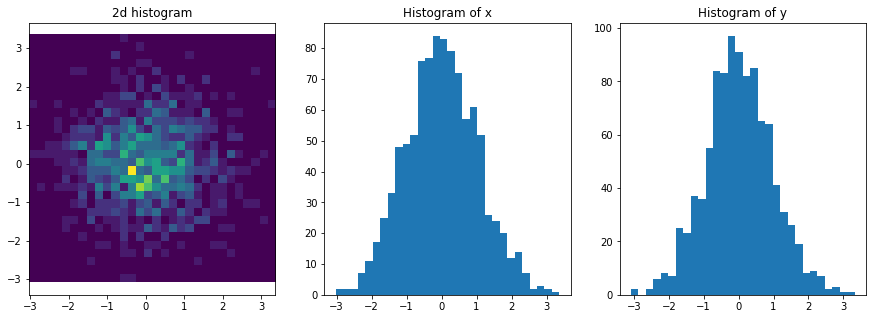

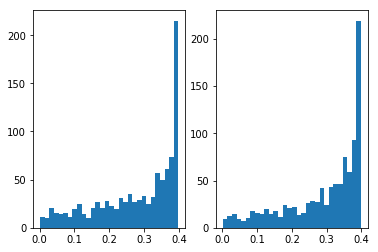

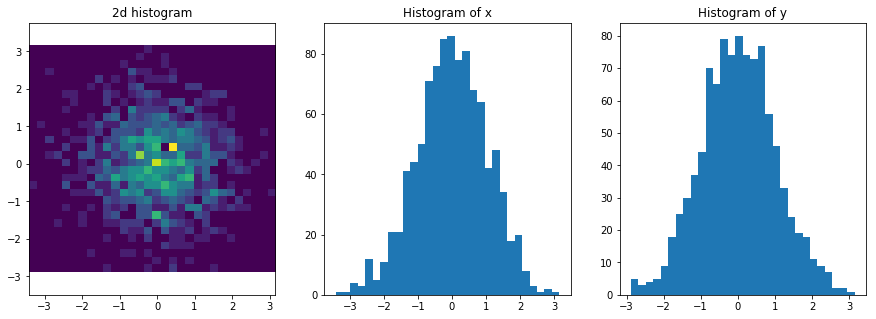

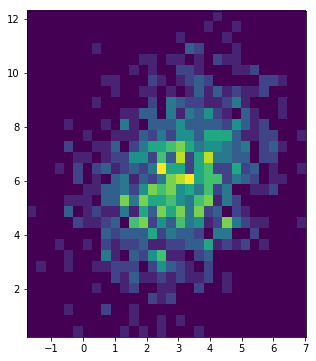

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

rx = np.sqrt(1/(2*np.pi))*np.exp(-x**2/2)
ry = np.sqrt(1/(2*np.pi))*np.exp(-y**2/2)
plt.subplot(1,2,1)
plt.hist(rx, bins = 30)
plt.subplot(1,2,2)
plt.hist(ry, bins = 30)
plt.show()

#Модификация
n = 1000
i = 0
u1=np.array([])
u2=np.array([])
while i<n:
    u11, u22 = 2*np.random.rand(2,1)-1
    gg=u11**2+u22**2
    if 0<gg<=1:
        u1=np.append(u1, u11)
        u2=np.append(u2, u22)
        i+=1
g=u1**2+u2**2
p=np.sqrt(-2*np.log(g)/g)
x=u1*p
y=u2*p
fig, a=plt.subplots(1, 3, figsize=(15, 5))
a[0].hist2d(x, y, bins=30)
a[0].axis('equal')
a[1].hist(x, bins=30)
a[2].hist(y, bins=30)
a[0].set_title("2d histogram")
a[1].set_title("Histogram of x")
a[2].set_title("Histogram of y")
plt.show()
#С помощью модификации смоделируем выборку n=1000 из 
#гауссовского закона с данными вектором средних(3, 6) и матрицей ковариации((2, 1),(1, 4))
# a22=2, a21=np.sqrt(4-a21**2), a12=1/a22 и a11=np.sqrt(2-a12**2) 
k=np.sqrt(7)/2*x+1/2*y+3 
z=2*y+6 
plt.figure(figsize=(5,6)) 
plt.hist2d(k, z, bins=30) 
plt.show()

8. Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Используем ЗБЧ для оценки ожидаемого числа подмножеств в случайном разбиении 100 элементного множества.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
n = 100
def part(n, size):
    a=np.zeros(n)
    c=1
    for i in range(n):
        c*=(i + 1)
        a[i]=(i + 1)**n/c
    a/=a.sum()
    gr=np.random.choice(np.arange(1, n+1), p=a, size=size)
    b=np.zeros((size, n))
    for i in range(size):
        b[i,:] = np.random.choice(np.arange(1, gr[i] + 1), size=n)
    return b                
                
                            
part(100, 8000).max(axis=1).mean()

29.582625